<a href="https://colab.research.google.com/github/barauna-lo/Artificial_Inteligence/blob/main/CAP345_Artificial_Intelience_AT01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/CAP4213-Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 500 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP-345-3 - Inteligência Artificial

* Aline Nascimento
* Lourenço Cavalcante
* Luan Orion Baraúna

These code was provide for [this](https://sites.google.com/view/ia-inpe-2022/) course. 




# Atividade 1 - Análise do problema e dos dados

1) Considere os conceitos apresentados em aula e o problema apresentado pela Dra. Tahisa (apres_problema.pdf)
link: https://drive.google.com/file/d/1OzCFj26aTVmw-dEAGhAhTbv2kFO2K7YD/view?usp=sharing

 
Apresente a introdução de um artigo (seção 1) em um documento no formato (IEEE) (https://www.ieee.org/conferences/publishing/templates.html), contendo: 
A descrição do problema, a motivação, os objetivos, possíveis técnicas a serem empregadas e resultados esperados.  
 
2) Considere os dados disponíveis nos arquivos .csv: 

Conjunto 1 – 1o período: 
   1. Sentinel 1. Data: 28-05-2022 
   2. Sentinel 2. Data: 31-05-2022 

Conjunto 2 – 2o período: 
   1. Sentinel 1. Data: 07-10-2022 
   2. Sentinel 2. Data: 08-10-2022 

Apresente a análise e tratamento dos dados (seção 2) no mesmo documento no formato IEEE.

   a) descreva as entradas e saídas para o problema considerado;

   b) descreva informações dos conjuntos de dados; 
   
   c) descreva e apresente análises de possíveis dados faltantes e outliers; 
   
   d) descreva e apresente análises estatísticas dos dados; 
   
   e) descreva e apresente possíveis correlações dos dados; 
 
As análises podem ser feitas no Orange ou com bibliotecas Python ou R. 
O trabalho pode ser feito em grupo de até 3 pessoas. Cada um deve postar a atividade (arquivos .pdf e programa), com indicação da composição do grupo.

Data de postagem: 22/04/2022


===============

ATENÇÃO: Os dados anteriormente compartilhados podem apresentar dificuldades na fase de leitura. 
Estamos disponibilizando os mesmos dados em formato diferente, no link abaixo.

https://drive.google.com/drive/folders/1jLUUUl-KcNOaDWGRkivA6C5g-gE7FZUd?usp=sharing


# 1) Introdução:
A introdução do problema pode ser encontrada [nesta](https://www.overleaf.com/read/xwtdcgxpnytc) versão do Overleaf

# 2) Considere os dados disponíveis nos arquivos .csv: 


In [1]:
#Import Librarys 📚
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import seaborn as sns
#from pyparsing.core import ZeroOrMore
#from itertools import combinations

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
#sns.set(style="darkgrid")

In [2]:
#Downloading data frames from Google Drive
!gdown --id 12l96KuvmDKNskSe8Zzf0yt-DwKwb_uPh
!gdown --id 1RUSxSQX5bYIsr4ewGM_u0jRs3-edj7ze
!gdown --id 1funnNkha2LANOsXtSZus0iZAD6R3_5xR
!gdown --id 1uu1pH1_Y1ztqg8ugSkwc7lNqiRBSdMuz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=12l96KuvmDKNskSe8Zzf0yt-DwKwb_uPh
To: /content/S120200528.csv
100% 36.1M/36.1M [00:00<00:00, 215MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RUSxSQX5bYIsr4ewGM_u0jRs3-edj7ze
To: /content/S120201007.csv
100% 36.4M/36.4M [00:00<00:00, 90.1MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From

In [3]:
#Reading the data and Sorting in cresceting order in DN Classes

Sent1D1=pd.read_csv('S120200528.csv').sort_values(by=['DN']) #Sentinel-1 Date 1
Sent1D2=pd.read_csv('S120201007.csv').sort_values(by=['DN']) #Sentinel-1 Date 2
Sent2D1=pd.read_csv('S220200531.csv').sort_values(by=['DN']) #Sentinel-2 Date 1
Sent2D2=pd.read_csv('S220201008.csv').sort_values(by=['DN']) #Sentinel-2 Date 2

## a) descreva as entradas e saídas para o problema considerado;

Este é um problema de **CLASSIFICAÇÃO**. Para isso iremos utilizas como classe os elementos da coluna `DN` do conjunto de dados. Para classificamos os objetos de uma determinada classe utilizaremos as demais colunas da tabela que podem ser encontradas com vizualizadas com `df.colluns`

In [4]:
Sent1D2.columns

Index(['fid', 'DN', '20201007_S1_VH_count', '20201007_S1_VH_sum',
       '20201007_S1_VH_mean', '20201007_S1_VH_median', '20201007_S1_VH_stdev',
       '20201007_S1_VH_min', '20201007_S1_VH_max', '20201007_S1_VH_range',
       '20201007_S1_VH_minority', '20201007_S1_VH_majority',
       '20201007_S1_VH_variety', '20201007_S1_VH_variance',
       '20201007_S1_VV_count', '20201007_S1_VV_sum', '20201007_S1_VV_mean',
       '20201007_S1_VV_median', '20201007_S1_VV_stdev', '20201007_S1_VV_min',
       '20201007_S1_VV_max', '20201007_S1_VV_range', '20201007_S1_VV_minority',
       '20201007_S1_VV_majority', '20201007_S1_VV_variety',
       '20201007_S1_VV_variance'],
      dtype='object')

## b) descreva informações dos conjuntos de dados; 

Os dados são provenientes de um processo de [_Segmentação de Imagens_](https://en.wikipedia.org/wiki/Image_segmentation) das imagens extraídas do satélites [Sentinel-1](https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-1) e [Sentinel-2](https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-2) em 4 conjuntos de dados diferentes proveniente dos dois satélites em datas diferentes. 

As segmentações possuem uma identificação na coluna `fid`, uma classe associada a classificação do [MapBiomas Brasil Coleção 06](https://mapbiomas.org/estatisticas) `DM` e um conjunto de atributos separados alocados nas colunas. Cada conjunto de dados possui uma quantidade de atributos diferentes.

In [5]:
print('Sentinel-1 \n' ,len(Sent1D1.columns) , 'for  2020/05/28' , ' and  ' , len(Sent1D2.columns), 'for  2020/10/07')
print('Sentinel-2 \n' ,len(Sent2D1.columns) , 'for  2020/05/31' , ' and  ' , len(Sent2D2.columns), 'for  2020/10/08')

Sentinel-1 
 26 for  2020/05/28  and   26 for  2020/10/07
Sentinel-2 
 158 for  2020/05/31  and   158 for  2020/10/08


## c) Descreva e apresente análises de possíveis dados faltantes e outliers;

Vamos olhar cada um dos conjuntos de dados.

In [6]:
#Sentinel -1
print('Sentinel -1\n')
print(Sent1D1.info())
print('\n \n')
print(Sent1D2.info())
print('\n#########################################\n')
print('Sentinel -2\n')
print(Sent2D1.info())
print('\n')
print(Sent2D2.info())
#https://medium.com/turing-talks/como-fazer-uma-limpeza-de-dados-completa-em-python-7abc9dfc19b8

Sentinel -1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90064 entries, 51903 to 41330
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fid                      90064 non-null  int64  
 1   DN                       90064 non-null  int64  
 2   S1_20200528_VHcount      90064 non-null  float64
 3   S1_20200528_VHsum        90064 non-null  float64
 4   S1_20200528_VHmean       90064 non-null  float64
 5   S1_20200528_VHmedian     90064 non-null  float64
 6   S1_20200528_VHstdev      90064 non-null  float64
 7   S1_20200528_VHmin        90064 non-null  float64
 8   S1_20200528_VHmax        90064 non-null  float64
 9   S1_20200528_VHrange      90064 non-null  float64
 10  S1_20200528_VHminority   90064 non-null  float64
 11  S1_20200528_VHmajority   90064 non-null  float64
 12  S1_20200528_VHvariety    90064 non-null  int64  
 13  S1_20200528_VHvariance   90064 non-null  float64
 14  S1_20

Index(['fid', 
'DN', 'S1_20200528_VHcount',
 'S1_20200528_VHsum',
       'S1_20200528_VHmean', 'S1_20200528_VHmedian', 'S1_20200528_VHstdev',
       'S1_20200528_VHmin', 'S1_20200528_VHmax', 'S1_20200528_VHrange',
       'S1_20200528_VHminority', 'S1_20200528_VHmajority',
       'S1_20200528_VHvariety', 'S1_20200528_VHvariance',
       'S1_20200528_VV_count', 'S1_20200528_VV_sum', 'S1_20200528_VV_mean',
       'S1_20200528_VV_median', 'S1_20200528_VV_stdev', 'S1_20200528_VV_min',
       'S1_20200528_VV_max', 'S1_20200528_VV_range', 'S1_20200528_VV_minority',
       'S1_20200528_VV_majority', 'S1_20200528_VV_variety',
       'S1_20200528_VV_variance'],
      dtype='object')

Agora iremos procurar por dados nulos em cada um dos conjuntos de dados

In [7]:
print('Sentinel-1 Data 1\n',Sent1D1.isna().sum(),'\n')
print('Sentinel-1 Data 2\n',Sent1D2.isna().sum(),'\n')
print('Sentinel-2 Data 1\n',Sent2D2.isna().sum(),'\n')
print('Sentinel-2 Data 2\n',Sent2D2.isna().sum(),'\n')

Sentinel-1 Data 1
 fid                        0
DN                         0
S1_20200528_VHcount        0
S1_20200528_VHsum          0
S1_20200528_VHmean         0
S1_20200528_VHmedian       0
S1_20200528_VHstdev        0
S1_20200528_VHmin          0
S1_20200528_VHmax          0
S1_20200528_VHrange        0
S1_20200528_VHminority     0
S1_20200528_VHmajority     0
S1_20200528_VHvariety      0
S1_20200528_VHvariance     0
S1_20200528_VV_count       0
S1_20200528_VV_sum         0
S1_20200528_VV_mean        0
S1_20200528_VV_median      0
S1_20200528_VV_stdev       0
S1_20200528_VV_min         0
S1_20200528_VV_max         0
S1_20200528_VV_range       0
S1_20200528_VV_minority    0
S1_20200528_VV_majority    0
S1_20200528_VV_variety     0
S1_20200528_VV_variance    0
dtype: int64 

Sentinel-1 Data 2
 fid                        0
DN                         0
20201007_S1_VH_count       0
20201007_S1_VH_sum         0
20201007_S1_VH_mean        0
20201007_S1_VH_median      0
20201007_S1_VH_stde

Iremos deletar todas as linhas que possírem dados nulos em todas as colunas.

In [8]:
Sent1D1 = Sent1D1.drop(Sent1D1.index[[0,1]])
Sent1D2 = Sent1D2.drop(Sent1D2.index[[0,1]])
Sent2D1 = Sent2D1.drop(Sent2D1.index[[0,1]])
Sent2D2 = Sent2D2.drop(Sent2D2.index[[0,1]])

In [9]:
print('Sentinel-1 Data 1\n',Sent1D1.isna().sum(),'\n')
print('Sentinel-1 Data 2\n',Sent1D2.isna().sum(),'\n')
print('Sentinel-2 Data 1\n',Sent2D2.isna().sum(),'\n')
print('Sentinel-2 Data 2\n',Sent2D2.isna().sum(),'\n')

Sentinel-1 Data 1
 fid                        0
DN                         0
S1_20200528_VHcount        0
S1_20200528_VHsum          0
S1_20200528_VHmean         0
S1_20200528_VHmedian       0
S1_20200528_VHstdev        0
S1_20200528_VHmin          0
S1_20200528_VHmax          0
S1_20200528_VHrange        0
S1_20200528_VHminority     0
S1_20200528_VHmajority     0
S1_20200528_VHvariety      0
S1_20200528_VHvariance     0
S1_20200528_VV_count       0
S1_20200528_VV_sum         0
S1_20200528_VV_mean        0
S1_20200528_VV_median      0
S1_20200528_VV_stdev       0
S1_20200528_VV_min         0
S1_20200528_VV_max         0
S1_20200528_VV_range       0
S1_20200528_VV_minority    0
S1_20200528_VV_majority    0
S1_20200528_VV_variety     0
S1_20200528_VV_variance    0
dtype: int64 

Sentinel-1 Data 2
 fid                        0
DN                         0
20201007_S1_VH_count       0
20201007_S1_VH_sum         0
20201007_S1_VH_mean        0
20201007_S1_VH_median      0
20201007_S1_VH_stde

## d) descreva e apresente análises estatísticas dos dados;

A primeira pergunta que procuraremos responder é sobre a distribuição de segmentação por classes em cada um dos conjuntos de dados.

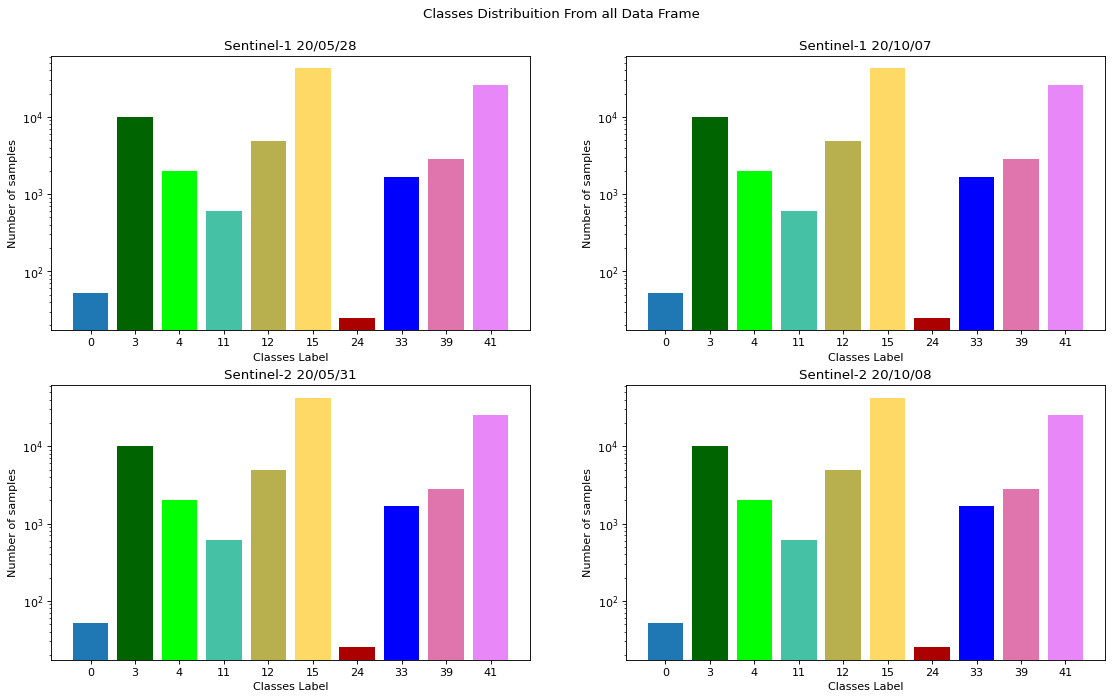

In [73]:
from collections import Counter
#Alocating Frequency Data
freqs = [Counter(Sent1D1['DN'].values),
         Counter(Sent2D1['DN'].values),
         Counter(Sent1D2['DN'].values),
         Counter(Sent2D2['DN'].values)]
#Alocanting Classes Values
xvals = []
for i in range(len(freqs)):
  xvals.append(range(len(freqs[i].values())) )
#Titles Classes
titles =['Sentinel-1 20/05/28',
         'Sentinel-1 20/10/07',
         'Sentinel-2 20/05/31',
         'Sentinel-2 20/10/08']

#Colors Label From the MapBiomas 06 
colors = ['C0','#006400','#00ff00','#45C2A5','#B8AF4F','#FFD966','#aa0000','#0000FF','#e075ad','#e787f8']

#Ploting Figure
figure(figsize=(17, 10), dpi=80)


plt.suptitle("Classes Distribuition From all Data Frame",y=0.94)
for i in range(len(titles)):
  plt.subplot(2,2,(i+1))
  plt.bar(xvals[i], freqs[i].values(),color = colors)
  plt.xticks(xvals[i], freqs[i].keys())
  plt.xlabel('Classes Label')
  plt.ylabel('Number of samples')
  plt.yscale("log")
  plt.title(titles[i])
plt.show() 
#https://stackoverflow.com/questions/56850735/matplotlib-histogram-with-non-numerical-data

10

Iremos analizar para o caso do Sentinel-1 que possui 26 classes, a distribuição de dados para cada classe

In [112]:
#Creating tabels for eache Classes

Sent1D1_CLASSES=[Sent1D1.loc[Sent1D1['DN'] == 0],
                 Sent1D1.loc[Sent1D1['DN'] == 3],
                 Sent1D1.loc[Sent1D1['DN'] == 4],
                 Sent1D1.loc[Sent1D1['DN'] ==11],
                 Sent1D1.loc[Sent1D1['DN'] ==12],
                 Sent1D1.loc[Sent1D1['DN'] ==15],
                 Sent1D1.loc[Sent1D1['DN'] ==24],
                 Sent1D1.loc[Sent1D1['DN'] ==33],
                 Sent1D1.loc[Sent1D1['DN'] ==39],
                 Sent1D1.loc[Sent1D1['DN'] ==41]]
#Tiles Labels                
titles_class = ['No Label data','Forest Formation','Savanna Formation', 'Wetlands','Grassland',' Pasture','Urban Area',' River,Lake and Ocean','Soybean','Other temporary Crops']

In [114]:
data

NameError: ignored

No handles with labels found to put in legend.


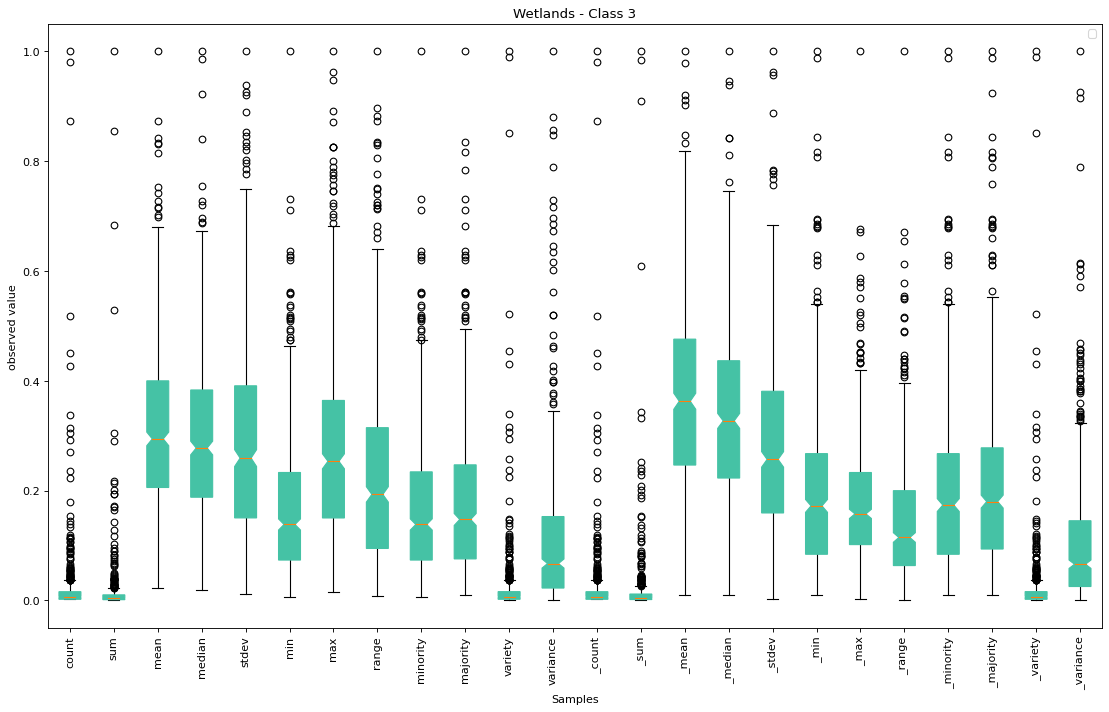

In [115]:
j=3


figure(figsize=(17, 10), dpi=80)


data = Sent1D1_CLASSES
#Alocating coluns namnes in a vector 
col_name = [] 
for col in Sent1D1.columns: col_name.append(col)
#Alocating coluns in vector ⚠️ NORMALIZED ⚠️ ! Can I done these directily from pandas???
all_data = []
for i in range(2,len(col_name)): all_data.append(data[j][col_name[i]].values/max(data[j][col_name[i]].values)) 
#Alocating Labels
labels = []
for i in range (2,len(col_name)): labels.append(col_name[i][14:])

#Ploting boxplot
plt.boxplot(all_data, vert=True, labels=labels, patch_artist=True, notch=True, 
            boxprops=dict(facecolor=colors[j], color=colors[j]))
plt.ylabel('observed value')
plt.xlabel('Samples')
plt.title(titles_class[j]+ f' - Class {j}')
plt.legend()
plt.xticks(rotation=90)
plt.show()


No handles with labels found to put in legend.


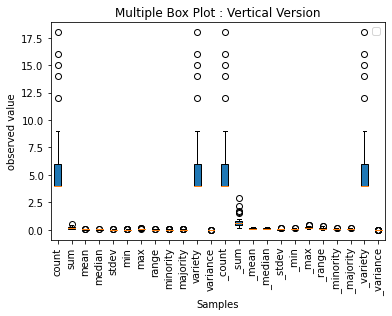

## e) descreva e apresente possíveis correlações dos dados;